In [4]:
import numpy as np
import json
from pymatgen.core.structure import Structure
from smol.io import load_work, save_work
import os
from smol.moca import Ensemble
from smol.moca import Sampler
from smol.capp.generate import generate_random_ordered_occupancy
from matplotlib import pyplot as plt


# create cluster expansion from scratch using modules 
import sys 
sys.path.append('../Modules')
from cluster_creator import prim_entry_dataloader, cluster_subspace_creator, structure_wrangler_creator 
from eci_fitter import eci_fitter
from structure_generation import create_cca_primitive, closest_composition

In [ ]:
# get the compositions 

In [6]:
# get a list of all the ensembles in the directory 
#expansion_path = '../Expansions/VCrTiWZr'
expansion_path = '../Expansions/VCrTi_Fixed'

# get a list of all the ensembles in the directory
expansion_list = []
for root, dirs, files in os.walk(expansion_path):
    for file in files:
        if file.endswith('.mson'):
            expansion_list.append(os.path.join(root, file))

print(expansion_list)

['../Expansions/VCrTi_Fixed/V0_763-Cr0_126-Ti0_111_fin_work.mson', '../Expansions/VCrTi_Fixed/V0_605-Cr0_095-Ti0_3_fin_work.mson', '../Expansions/VCrTi_Fixed/V0_605-Cr0_3-Ti0_095_fin_work.mson', '../Expansions/VCrTi_Fixed/V0_90625-Cr0_046875-Ti0_046875_fin_work.mson']


In [17]:
expansion_list = ['../Expansions/VCrTiWZr/Cr0_0763-Ti0_0709-Zr0_0457-W0_0178-V0_7893_fin_work.mson']

The supercell size for the processor is 4096 prims.
The ensemble has a total of 4096 sites.
The active sublattices are:
Sublattice(site_space=V0.763 Cr0.126 Ti0.111 , sites=array([   0,    1,    2, ..., 4093, 4094, 4095]), active_sites=array([   0,    1,    2, ..., 4093, 4094, 4095]), encoding=array([0, 1, 2]))
Sampling information: Metadata(cls_name='SampleContainer', kernels=[Metadata(seed=4085252614145178088335221827538625236, step=Metadata(sublattices=[(Element Ti, Element V, Element Cr)], sublattice_probabilities=array([1.]), cls_name='Swap'), cls_name='Metropolis')])
['REDIRECT', '__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__get_validators__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__modify_schema__', '__module__', '__ne__', 

Sampling 1 chain(s) from a cell with 4096 sites: 100%|██████████| 1000000/1000000 [00:42<00:00, 23594.21it/s]


Fraction of successful steps (efficiency) 0.0244
The last step energy is -36962.95724133935 eV
The minimum energy in trajectory is -36968.10107668737 eV
[-36351.88376416 -36364.36120486 -36374.35145202 ... -36963.07749659
 -36962.7911682  -36962.95724134]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -36938.21499419556 eV
The energy variance is 2338.175473213508 eV^2
The sampling efficiency (acceptance rate) is approximately 0.022525252525252525
Full Formula (Ti455 V3125 Cr516)
Reduced Formula: Ti455V3125Cr516
abc   :  41.707783  41.707783  41.707783
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (4096)
   #  SP         a       b       c
----  ----  ------  ------  ------
   0  V     0       0       0
   1  V     0       0       0.0625
   2  V     0       0       0.125
   3  V     0       0       0.1875
   4  V     0       0       0.25
   5  V     0       0       0.3125
   6  V     0       0  

Sampling 1 chain(s) from a cell with 4096 sites: 100%|██████████| 1000000/1000000 [00:46<00:00, 21718.07it/s]


Fraction of successful steps (efficiency) 0.0081
The last step energy is -36630.48824843823 eV
The minimum energy in trajectory is -36634.77076894519 eV
[-35312.68403988 -35330.18526442 -35347.31148353 ... -36630.42488629
 -36630.42488629 -36630.48824844]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -36600.2022740193 eV
The energy variance is 6236.178322174883 eV^2
The sampling efficiency (acceptance rate) is approximately 0.006767676767676768
Full Formula (Ti1229 V2478 Cr389)
Reduced Formula: Ti1229V2478Cr389
abc   :  41.707783  41.707783  41.707783
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (4096)
   #  SP         a       b       c
----  ----  ------  ------  ------
   0  V     0       0       0
   1  Cr    0       0       0.0625
   2  V     0       0       0.125
   3  V     0       0       0.1875
   4  V     0       0       0.25
   5  V     0       0       0.3125
   6  V     0       0 

Sampling 1 chain(s) from a cell with 4096 sites: 100%|██████████| 1000000/1000000 [00:44<00:00, 22408.54it/s]


Fraction of successful steps (efficiency) 0.041
The last step energy is -37574.68971060215 eV
The minimum energy in trajectory is -37583.23534249229 eV
[-36927.82982273 -36946.56114388 -36956.9448506  ... -37575.22484817
 -37575.13427793 -37574.6897106 ]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -37532.5455394523 eV
The energy variance is 4404.807351595217 eV^2
The sampling efficiency (acceptance rate) is approximately 0.03909090909090909
Full Formula (Ti389 V2478 Cr1229)
Reduced Formula: Ti389V2478Cr1229
abc   :  41.707783  41.707783  41.707783
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (4096)
   #  SP         a       b       c
----  ----  ------  ------  ------
   0  Cr    0       0       0
   1  V     0       0       0.0625
   2  V     0       0       0.125
   3  V     0       0       0.1875
   4  Cr    0       0       0.25
   5  V     0       0       0.3125
   6  Cr    0       0   

Sampling 1 chain(s) from a cell with 4096 sites: 100%|██████████| 1000000/1000000 [00:40<00:00, 24420.70it/s]


Fraction of successful steps (efficiency) 0.0176
The last step energy is -36902.717559171695 eV
The minimum energy in trajectory is -36904.501808762776 eV
[-36605.7946948  -36615.78781462 -36625.36953484 ... -36902.73205903
 -36902.73205903 -36902.71755917]
A total of 10000 samples taken.
A total of 9900 samples used for production.
The average energy is -36883.208250021315 eV
The energy variance is 653.1781966607656 eV^2
The sampling efficiency (acceptance rate) is approximately 0.016565656565656565
Full Formula (Ti192 V3712 Cr192)
Reduced Formula: Ti3V58Cr3
abc   :  41.707783  41.707783  41.707783
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (4096)
   #  SP         a       b       c
----  ----  ------  ------  ------
   0  V     0       0       0
   1  V     0       0       0.0625
   2  V     0       0       0.125
   3  V     0       0       0.1875
   4  V     0       0       0.25
   5  V     0       0       0.3125
   6  V     0       0     

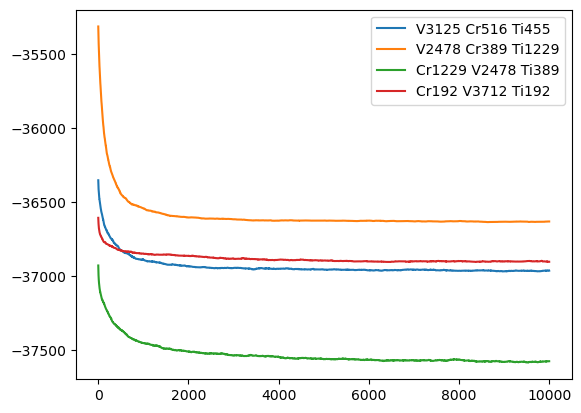

In [8]:
for i, expansion_path in enumerate(expansion_list):
    work = load_work(expansion_path)
    expansion = work['ClusterExpansion']
    # Create the ensemble
    # This specifies the size of the MC simulation domain.
    # this gives a 64 site unit cell
    sc_matrix = np.array([
        [16, 0, 0],
        [0, 16, 0],
        [0, 0, 16]
    ])
    # this convenience method will take care of creating the appropriate
    # processor for the given cluster expansion.
    #os.environ['OMP_NUM_THREADS'] = '4'
    ensemble = Ensemble.from_cluster_expansion(expansion, sc_matrix)
    ensemble.processor.num_threads_full = 5

    # In a real scenario you may want a much larger processor.size
    # An MC step is O(1) with the processor.size, meaning it runs at
    # the same speed regardless of the size. However, larger sizes
    # will need many more steps to reach equilibrium in an MC simulation.
    print(f'The supercell size for the processor is {ensemble.processor.size} prims.')
    print(f'The ensemble has a total of {ensemble.num_sites} sites.')
    print(f'The active sublattices are:')
    for sublattice in ensemble.sublattices:
        print(sublattice)


    # here we also set the temperature to our operating temperature, in V-Cr-Ti this should be around 900K 
    T_sample = 973.15
    sampler = Sampler.from_ensemble(ensemble, temperature=T_sample)
    print(f"Sampling information: {sampler.samples.metadata}")
    compositions = [sublattice.composition for sublattice in ensemble.sublattices]

    print(dir(sublattice))
    compositions = [sublattice.composition for sublattice in ensemble.sublattices]
    print(f'The compositions are {compositions}')
    try:
        # this will raise an error if the ensemble is not ordered
        init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                                    composition=compositions,
                                                    tol = 0.99,
                                                    rng=42)
    except:
        #raise ValueError('The ensemble is not ordered, please check the ensemble and try again.')
        print('The ensemble is not ordered, please check the ensemble and try again.')
        continue
    #init_occu = generate_random_ordered_occupancy(processor= ensemble.processor,
                                                #composition=compositions,
                                                #tol = 0.99,
                                                #rng=42)

    print(f"The disordered structure has composition: {ensemble.processor.structure.composition}")
    print(f"The initial occupancy has composition: {ensemble.processor.structure_from_occupancy(init_occu).composition}")

    print(f'The encoded occupancy is:\n{init_occu}')
    print(f'The initial occupancy is:\n {ensemble.processor.decode_occupancy(init_occu)}')

    # run 1M iterations
    # since this is the first run, the initial occupancy must be supplied
    sampler.run(
        1000000,
        initial_occupancies=init_occu,
        thin_by=100, # thin_by will save every 100th sample only
        progress=True
    ) # progress will show progress bar

    # Samples are saved in a sample container
    samples = sampler.samples

    print(f'Fraction of successful steps (efficiency) {sampler.efficiency()}')
    print(f'The last step energy is {samples.get_energies()[-1]} eV')
    print(f'The minimum energy in trajectory is {samples.get_minimum_energy()} eV')

    # You can get the minimum energy structure and current structure
    # by using the ensemble processor
    curr_s = ensemble.processor.structure_from_occupancy(samples.get_occupancies()[-1])
    min_s = ensemble.processor.structure_from_occupancy(samples.get_minimum_energy_occupancy())

    #from smol.moca.analysis.convergence import check_property_converged, determine_discard_number

    energies = samples.get_energies()
    # 100 as an initial guess for amount to discard
    #opt_discard = determine_discard_number(property_array=energies, init_discard=100, verbose=True)
    #converged = check_property_converged(energies[opt_discard:])
    #print(f'Is the energy converged after discarding the first {opt_discard} samples?', converged)
    print(energies)

    # let's plot the energy trajectories over time 

    import matplotlib.pyplot as plt
    runs = np.arange(len(energies))
    plt.plot(runs, energies,label=f'{ensemble.processor.structure_from_occupancy(init_occu).composition}')

    # Set 100 samples for burn-in, as determined in 5)
    discard = 100 # this is in terms of samples so it would be discard*thin_by steps
    print(f'A total of {len(samples)} samples taken.')
    print(f'A total of {len(samples.get_energies(discard=discard))} samples used for production.')
    print(f'The average energy is {samples.mean_energy(discard=discard)} eV')
    print(f'The energy variance is {samples.energy_variance(discard=discard)} eV^2')
    print(f'The sampling efficiency (acceptance rate) is approximately {samples.sampling_efficiency(discard=discard)}')


    #write these to cif files
    from pymatgen.io.cif import CifWriter
    structure_path = '../Visualization/Job_Structures/Pre_VASP/VCrTi_Fixed_4096'

    initial_structure = samples.get_sampled_structures(indices=[0])[0]
    print(initial_structure)

    # ChANGE THE NAME 
    # get the composition of the structure
    composition = initial_structure.composition.reduced_formula

    # Find the start and end of the substring
    start = expansion_path.find('VCrTi_Fixed/') + len('VCrTi_Fixed/')
    end = expansion_path.find('_fin_work.mson')

    # Extract the substring
    substring = expansion_path[start:end]

    # write the initial structure to a CIF file
    cif = CifWriter(initial_structure)
    total_initial_path = os.path.join(structure_path, substring + '_initial.cif')
    cif.write_file(total_initial_path)

    # print the last structure 
    final_structure = samples.get_sampled_structures(indices=[-1])[0]
    print(final_structure)

    # write the final structure to a CIF file
    cif = CifWriter(final_structure)
    total_final_path = os.path.join(structure_path, substring + '_final.cif')
    cif.write_file(total_final_path)
    
    # save the Sample container with the same name 
    total_sample_path = os.path.join(structure_path, substring + '_samples.mson')
    save_work(total_sample_path,samples)

plt.legend()
plt.show()

In [14]:
# pick random structure within the middle quartiles of the runsteps from the samples and write to cif file
middle_quartile = len(samples)//4
print(samples)
# get teh structure from the middle quartile
middle_structure = samples.get_sampled_structures(indices=[middle_quartile])[0]
print(middle_structure)
# write the middle structure to a CIF file
cif = CifWriter(middle_structure)
total_middle_path = os.path.join(structure_path, substring + '_middle.cif')
cif.write_file(total_middle_path)

Full Formula (Ti192 V3712 Cr192)
Reduced Formula: Ti3V58Cr3
abc   :  41.707783  41.707783  41.707783
angles: 109.471221 109.471221 109.471221
pbc   :       True       True       True
Sites (4096)
   #  SP         a       b       c
----  ----  ------  ------  ------
   0  V     0       0       0
   1  Ti    0       0       0.0625
   2  V     0       0       0.125
   3  V     0       0       0.1875
   4  V     0       0       0.25
   5  V     0       0       0.3125
   6  V     0       0       0.375
   7  V     0       0       0.4375
   8  V     0       0       0.5
   9  V     0       0       0.5625
  10  V     0       0       0.625
  11  V     0       0       0.6875
  12  V     0       0       0.75
  13  Cr    0       0       0.8125
  14  V     0       0       0.875
  15  Ti    0       0       0.9375
  16  Ti    0       0.0625  0
  17  V     0       0.0625  0.0625
  18  Cr    0       0.0625  0.125
  19  V     0       0.0625  0.1875
  20  V     0       0.0625  0.25
  21  V     0       0.0

In [25]:
import os
import numpy as np
from smol.io import load_work
from pymatgen.core.structure import Structure
from pymatgen.entries.computed_entries import ComputedStructureEntry
import json

# Directory containing the .mson files
directory = '../Visualization/Job_Structures/Pre_VASP/VCrTi_fixed_64'

# Initialize an empty list to store the computed structure entries
computed_entries = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.mson'):
        filepath = os.path.join(directory, filename)
        
        # Load the sample data from the .mson file
        samples = load_work(filepath)
        
        # Get the energies and structures
        energies = samples['SampleContainer'].get_energies()
        # Get the minimum energy and corresponding structure
        min_energy_index = np.argmin(energies)
        min_energy = energies[min_energy_index]

        min_structure = samples['SampleContainer'].get_sampled_structures(indices=[min_energy_index])[0]
        #min_structure = structures[min_energy_index]
                
        # Create a ComputedStructureEntry for the minimum energy structure
        min_entry = ComputedStructureEntry(structure=min_structure, energy=min_energy)
        
        # Append the entry to the list
        computed_entries.append(min_entry)

# Convert the list of entries to a JSON serializable format
entries_dict = [entry.as_dict() for entry in computed_entries]

# Save the list as a JSON file
output_filepath = '../Entries/post_mcmc_vcrti_entries.json'
with open(output_filepath, 'w') as f:
    json.dump(entries_dict, f)

print(f"Saved computed entries to {output_filepath}")


Saved computed entries to ../Entries/post_mcmc_vcrti_entries.json
